# Análise de Indicadores de Saúde para Diabetes
**Autores**: DANIELE DE ALMEIDA SILVA
**Data**: 14/07/2025

## 1. Introdução

Este projeto tem como objetivo analisar fatores de risco associados ao diabetes utilizando dados do Behavioral Risk Factor Surveillance System (BRFSS). Vamos explorar os dados, aplicar técnicas estatísticas e desenvolver modelos preditivos para identificar pacientes com maior risco de desenvolver diabetes.

**Objetivos**:
1. Realizar análise exploratória dos dados
2. Aplicar técnicas de imputação para dados faltantes
3. Realizar análises estatísticas (probabilidade e inferência)
4. Desenvolver e comparar modelos preditivos
5. Identificar os principais fatores de risco

## 2. Configuração do Ambiente

In [ ]:
# ----  Importação de bibliotecas ---- #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)
sns.set_palette("husl")

## 3. Carregamento e Exploração dos Dados

In [ ]:
# --  Carregar os dados --- #
try:
   
    caminho = r'C:\Projetos\PosGraduacao - Ciencia de Dados\Python\Proejto_Estatistica\diabetes_012_health_indicators_BRFSS2015.csv'
    df = pd.read_csv(
        caminho,
        encoding='utf-8',  
        na_values=['?', 'NA', 'N/A', 'NaN', ''] 
    )
    print(f"Dados carregados com sucesso! Shape: {df.shape}")
    print(f"Total de registros: {len(df)}")
    print(f"Colunas disponíveis: {list(df.columns)}")
    
except FileNotFoundError:
    print("Arquivo não encontrado. Por favor, verifique o caminho.")
    print(f"Caminho tentado: {caminho}")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {str(e)}")

if 'df' in locals():
    print("\nPrimeiras linhas do dataset:")
    display(df.head().style.set_caption("Amostra dos Dados").background_gradient(cmap='Blues'))
    print("\nÚltimas linhas do dataset:")
    display(df.tail(3).style.set_caption("Final dos Dados").background_gradient(cmap='Reds'))
    print("\nAmostra aleatória do dataset:")
    display(df.sample(5).style.set_caption("Amostra Aleatória").background_gradient(cmap='Greens'))
else:
    print("DataFrame não foi carregado. Verifique os erros acima.")

Dados carregados com sucesso! Shape: (253680, 22)
Total de registros: 253680
Colunas disponíveis: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Primeiras linhas do dataset:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.000000,1.000000,1.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000,18.000000,15.000000,1.000000,0.000000,9.000000,4.000000,3.000000
1,0.000000,0.000000,0.000000,0.000000,25.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,7.000000,6.000000,1.000000
2,0.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,0.000000,9.000000,4.000000,8.000000
3,0.000000,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,3.000000,6.000000
4,0.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,11.000000,5.000000,4.000000



Últimas linhas do dataset:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253677,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,2.000000
253678,0.000000,1.000000,0.000000,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,7.000000,5.000000,1.000000
253679,2.000000,1.000000,1.000000,1.000000,25.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,2.000000



Amostra aleatória do dataset:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
170322,0.000000,0.000000,0.000000,1.000000,30.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,8.000000,6.000000,8.000000
195113,0.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,5.000000,2.000000,0.000000,0.000000,5.000000,6.000000,8.000000
63711,2.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,5.000000,6.000000
158119,0.000000,1.000000,0.000000,1.000000,23.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000,7.000000
246811,2.000000,0.000000,0.000000,1.000000,31.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,5.000000


In [ ]:
# --  Informações sobre o dataset -- #
print("Informações do dataset:")
print(df.info())

#  --- Estatísticas descritivas --- #
print("\nEstatísticas descritivas:")
df.describe()

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 4. Pré-processamento dos Dados

In [ ]:
# --  Verificar dados faltantes --- #
print("Dados faltantes por coluna:")
df.isnull().sum()

Dados faltantes por coluna:


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### 4.1 Imputação de Dados com KNN

Vamos utilizar o KNN Imputer para preencher os valores faltantes, pois ele considera a similaridade entre observações para imputar valores mais realistas.

In [ ]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Colunas numéricas identificadas:", numeric_cols)

#  ---- Verificar se a coluna alvo existe antes de remover ---- #
target_col = 'Diabetes_012' 
if target_col in numeric_cols:
    numeric_cols.remove(target_col)
    print(f"Removida coluna alvo '{target_col}' da lista de imputação")
else:
    print(f"Atenção: '{target_col}' não está nas colunas numéricas ou já foi removida")

# ---  Verificar se há colunas para imputar --- #
if len(numeric_cols) > 0:
    print("\nColunas que serão imputadas:", numeric_cols)
    imputer = KNNImputer(n_neighbors=5)
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    print("\nDados imputados com sucesso!")
    print("\nValores ausentes após imputação:")
    print(df[numeric_cols].isnull().sum())
else:
    print("\nNenhuma coluna numérica disponível para imputação")

Colunas numéricas identificadas: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Removida coluna alvo 'Diabetes_012' da lista de imputação

Colunas que serão imputadas: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Dados imputados com sucesso!

Valores ausentes após imputação:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump

## 5. Análise Exploratória

Valores únicos na coluna Diabetes_012: [0.0, 1.0, 2.0]


C:\Users\Daniele\AppData\Local\Temp\ipykernel_9736\3866000072.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Diabetes_012', data=df, palette='viridis')


Classe 0.0: 213,703 pacientes (84.2%)
Classe 1.0: 4,631 pacientes (1.8%)
Classe 2.0: 35,346 pacientes (13.9%)


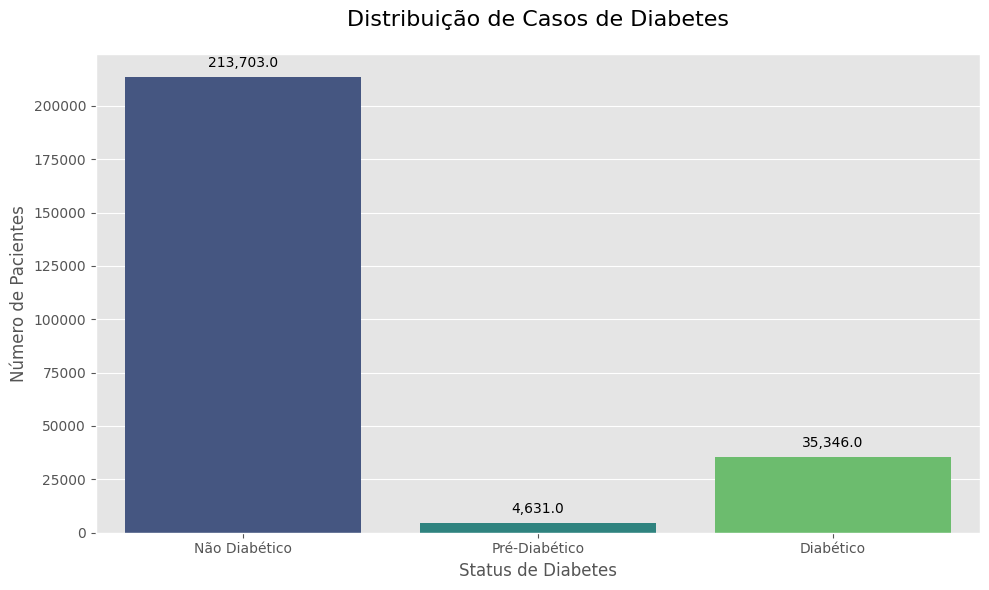

In [ ]:

plt.figure(figsize=(10, 6))
unique_values = df['Diabetes_012'].unique()
print("Valores únicos na coluna Diabetes_012:", sorted(unique_values))

# ---- Criando o gráfico de barras com anotações ---- #
ax = sns.countplot(x='Diabetes_012', data=df, palette='viridis')

plt.title('Distribuição de Casos de Diabetes', fontsize=16, pad=20)
plt.xlabel('Status de Diabetes', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)

# ----  Personalizando os ticks do eixo x com base nos valores encontrados --- #
if len(unique_values) == 2:
    plt.xticks([0, 1], ['Não Diabético', 'Diabético'])
elif len(unique_values) == 3:  
    plt.xticks([0, 1, 2], ['Não Diabético', 'Pré-Diabético', 'Diabético'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# ---  Calculando e mostrando as porcentagens --- #
total = len(df)
for i, value in enumerate(sorted(unique_values)):
    count = len(df[df['Diabetes_012'] == value])
    percentage = count / total * 100
    print(f"Classe {value}: {count:,} pacientes ({percentage:.1f}%)")

plt.tight_layout()
plt.show()

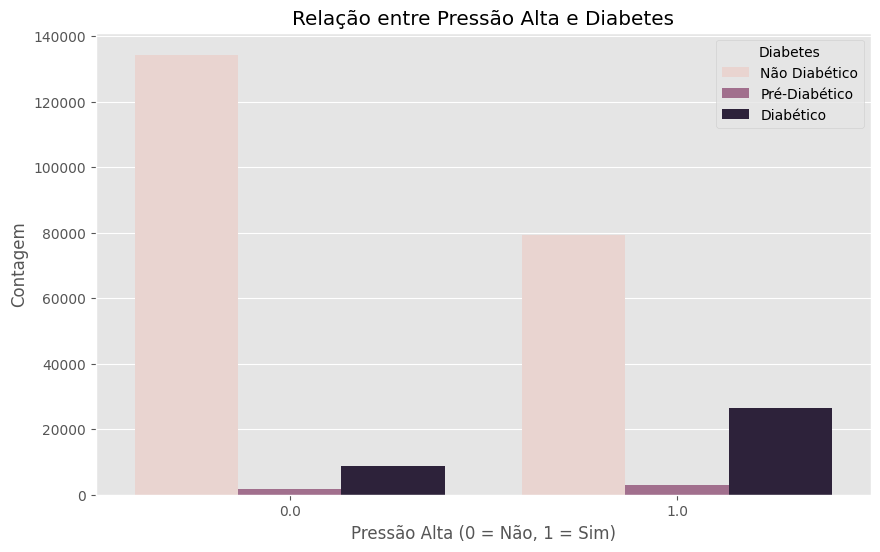

In [34]:
# Relação entre diabetes e pressão alta
plt.figure(figsize=(10, 6))
sns.countplot(x='HighBP', hue='Diabetes_012', data=df)
plt.title('Relação entre Pressão Alta e Diabetes')
plt.xlabel('Pressão Alta (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.legend(title='Diabetes', labels=['Não Diabético', 'Pré-Diabético', 'Diabético'])
plt.show()

C:\Users\Daniele\AppData\Local\Temp\ipykernel_9736\4205645588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y='BMI', data=df, palette='viridis')


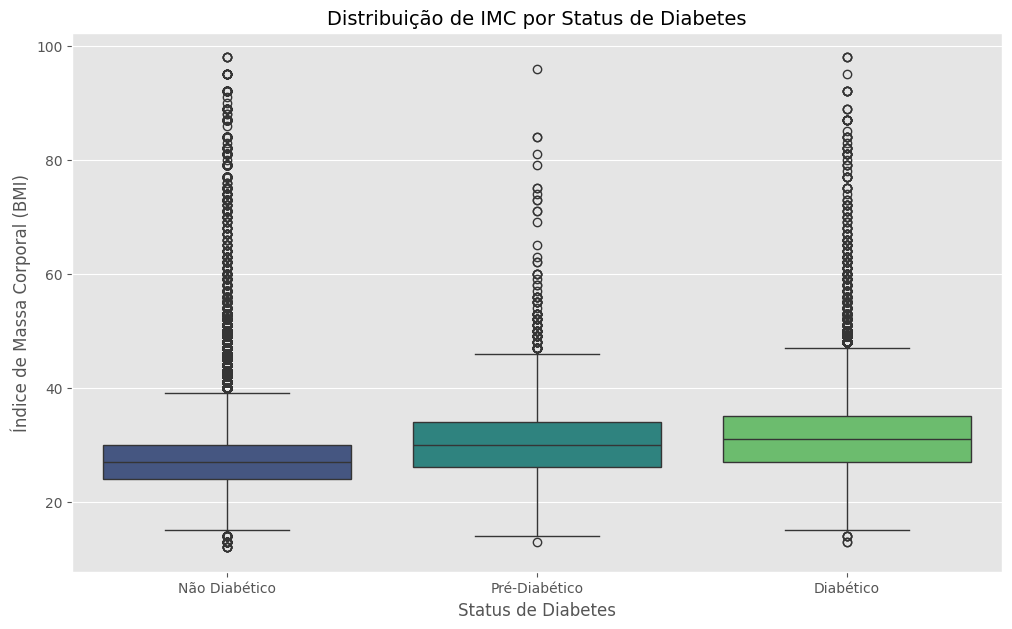

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Diabetes_012', y='BMI', data=df, palette='viridis')
plt.title('Distribuição de IMC por Status de Diabetes', fontsize=14)
plt.xlabel('Status de Diabetes', fontsize=12)
plt.ylabel('Índice de Massa Corporal (BMI)', fontsize=12)
plt.xticks([0, 1, 2], ['Não Diabético', 'Pré-Diabético', 'Diabético'])
plt.show()

C:\Users\Daniele\AppData\Local\Temp\ipykernel_9736\914443544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y='BMI', data=df, palette='viridis')


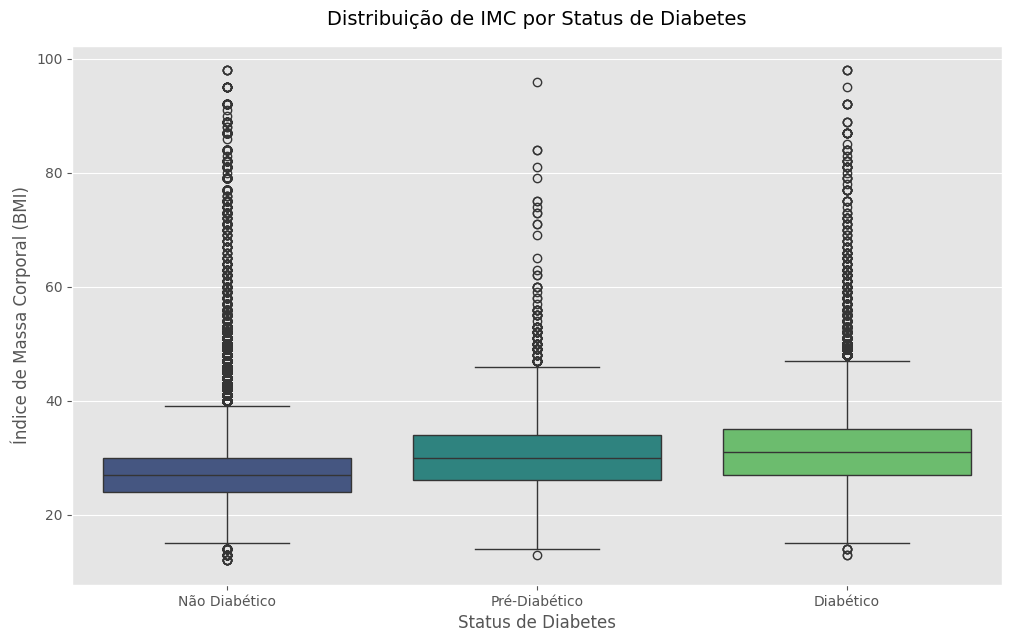

In [ ]:
# Distribuição de BMI por status de diabetes
plt.figure(figsize=(12, 7))
sns.boxplot(x='Diabetes_012', y='BMI', data=df, palette='viridis')
plt.title('Distribuição de IMC por Status de Diabetes', fontsize=14, pad=15)
plt.xlabel('Status de Diabetes', fontsize=12)
plt.ylabel('Índice de Massa Corporal (BMI)', fontsize=12)
plt.xticks([0, 1, 2], ['Não Diabético', 'Pré-Diabético', 'Diabético'])
plt.show()

## 6. Análise Estatística

### 6.1 Probabilidade Condicional

Qual a probabilidade de um paciente ter diabetes dado que tem pressão alta e colesterol alto?

In [ ]:
# Calculando P(Diabetes | HighBP e HighChol)
condition = (df['HighBP'] == 1) & (df['HighChol'] == 1)
total_high = df[condition].shape[0]

# Considerando tanto Diabetes_012 == 1 (pré-diabetes) quanto == 2 (diabetes)
diabetes_high = df[condition & (df['Diabetes_012'] >= 1)].shape[0]

if total_high > 0:
    prob = diabetes_high / total_high
    diabetes_rate = (df['Diabetes_012'] >= 1).mean()  # Probabilidade geral de diabetes ou pré-diabetes
    
    print(f"Probabilidade de diabetes/pré-diabetes dado pressão alta e colesterol alto: {prob:.2%}")
    print(f"Probabilidade geral de diabetes/pré-diabetes: {diabetes_rate:.2%}")
    print(f"Razão de chances: {prob/diabetes_rate:.2f}x")
else:
    print("Não há pacientes com ambas as condições (HighBP e HighChol) no dataset")

Probabilidade de diabetes/pré-diabetes dado pressão alta e colesterol alto: 32.84%
Probabilidade geral de diabetes/pré-diabetes: 15.76%
Razão de chances: 2.08x


### 6.2 Teste de Hipóteses

Testar se a proporção de diabetes é significativamente maior em pacientes com pressão alta.

In [ ]:
# Teste Z para proporções - Diabetes/Pré-diabetes vs Pressão Alta

# Criar variável binária combinando pré-diabetes (1) e diabetes (2)
df['Diabetes_combined'] = df['Diabetes_012'].apply(lambda x: 1 if x >= 1 else 0)

# Separar grupos
high_bp_group = df[df['HighBP'] == 1]['Diabetes_combined']
no_high_bp_group = df[df['HighBP'] == 0]['Diabetes_combined']

# Contagem de casos e tamanho dos grupos
count = [high_bp_group.sum(), no_high_bp_group.sum()]
nobs = [len(high_bp_group), len(no_high_bp_group)]

# Verificar se há dados suficientes
if all(x > 0 for x in nobs):
    # Executar teste Z
    z_stat, p_value = proportions_ztest(count, nobs)
    
    # Calcular proporções
    p_high_bp = count[0]/nobs[0]
    p_no_high_bp = count[1]/nobs[1]
    
    print("\nResultados do Teste Z para Proporções:")
    print("------------------------------------")
    print(f"Proporção com diabetes/pré-diabetes e HighBP: {p_high_bp:.2%}")
    print(f"Proporção com diabetes/pré-diabetes sem HighBP: {p_no_high_bp:.2%}")
    print(f"Diferença absoluta: {abs(p_high_bp - p_no_high_bp):.2%}")
    print("\nEstatísticas do Teste:")
    print(f"Z-score: {z_stat:.4f}")
    print(f"Valor-p: {p_value:.4g}")
    
    # Interpretação
    alpha = 0.05
    print("\nConclusão:")
    if p_value < alpha:
        print("Rejeitamos H0 - há diferença estatisticamente significativa (p < 0.05)")
        print(f"Pacientes com pressão alta têm {p_high_bp/p_no_high_bp:.1f}x mais chance de ter diabetes/pré-diabetes")
    else:
        print("Não rejeitamos H0 - não há evidência de diferença significativa")
else:
    print("Grupos muito pequenos para realizar o teste")


Resultados do Teste Z para Proporções:
------------------------------------
Proporção com diabetes/pré-diabetes e HighBP: 27.12%
Proporção com diabetes/pré-diabetes sem HighBP: 7.22%
Diferença absoluta: 19.90%

Estatísticas do Teste:
Z-score: 136.1583
Valor-p: 0

Conclusão:
Rejeitamos H0 - há diferença estatisticamente significativa (p < 0.05)
Pacientes com pressão alta têm 3.8x mais chance de ter diabetes/pré-diabetes


## 7. Modelagem Preditiva

### 7.1 Preparação dos Dados

In [ ]:
# Dividir dados em features e target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012'].apply(lambda x: 1 if x >= 1 else 0)  # Convertendo para binário (0 vs 1+2)

# Divisão treino-teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Balanceamento com SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

### 7.2 Treinamento e Avaliação de Modelos

c:\Users\Daniele\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


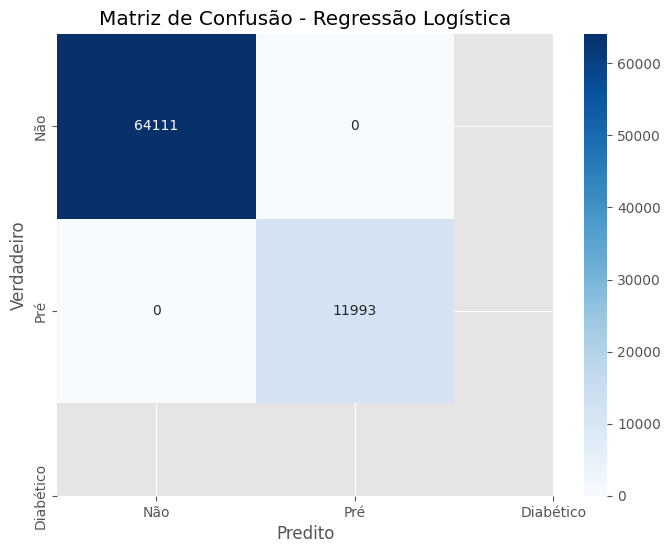

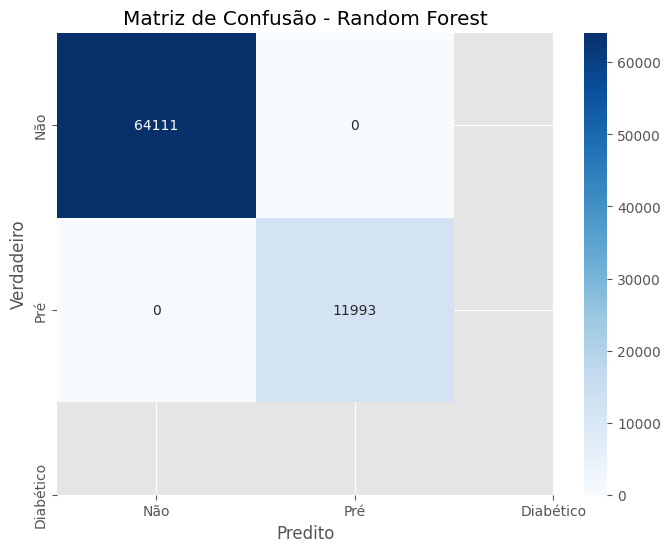

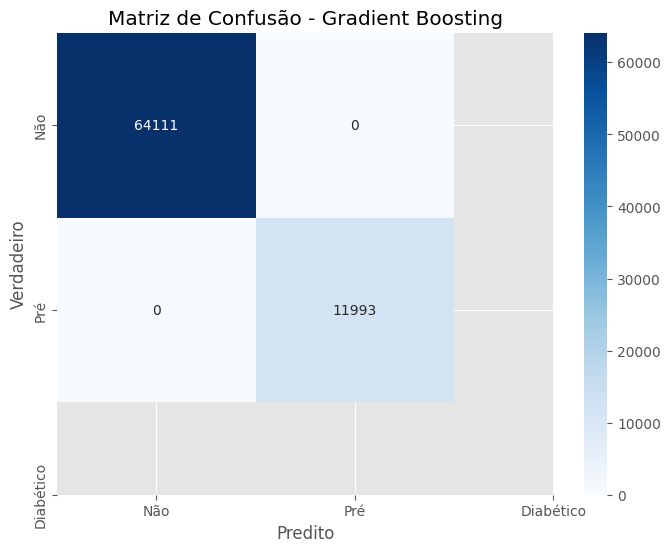

Desempenho dos Modelos (Multiclasse):


,Modelo,Acurácia,Precisão (macro),Recall (macro),F1 Score (macro),ROC AUC (média)
0,Regressão Logística,1.0,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0,1.0
2,Gradient Boosting,1.0,1.0,1.0,1.0,1.0


In [26]:
# Importações necessárias
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

# Inicializar modelos para classificação multiclasse
models = {
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Treinar e avaliar (versão multiclasse)
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train_smote)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)
    
    # Cálculo do ROC AUC para cada classe individualmente
    roc_auc_scores = []
    for i in range(len(np.unique(y_test))):  # Para cada classe
        if len(np.unique(y_test)) > 2:  # Se for multiclasse
            roc_auc_scores.append(roc_auc_score((y_test == i).astype(int), y_prob[:, i]))
        else:  # Se for binário
            roc_auc = roc_auc_score(y_test, y_prob[:, 1])
            break
    
    # Se multiclasse, calcula a média dos scores por classe
    roc_auc = np.mean(roc_auc_scores) if len(np.unique(y_test)) > 2 else roc_auc
    
    # Métricas multiclasse
    results.append({
        'Modelo': name,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão (macro)': precision_score(y_test, y_pred, average='macro'),
        'Recall (macro)': recall_score(y_test, y_pred, average='macro'),
        'F1 Score (macro)': f1_score(y_test, y_pred, average='macro'),
        'ROC AUC (média)': roc_auc
    })
    
    # Matriz de confusão multiclasse
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Não', 'Pré', 'Diabético'], 
                yticklabels=['Não', 'Pré', 'Diabético'])
    plt.title(f'Matriz de Confusão - {name}')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.show()

# Resultados
results_df = pd.DataFrame(results)
print("Desempenho dos Modelos (Multiclasse):")
display(results_df.sort_values(by='F1 Score (macro)', ascending=False))

### 7.3 Importância das Variáveis

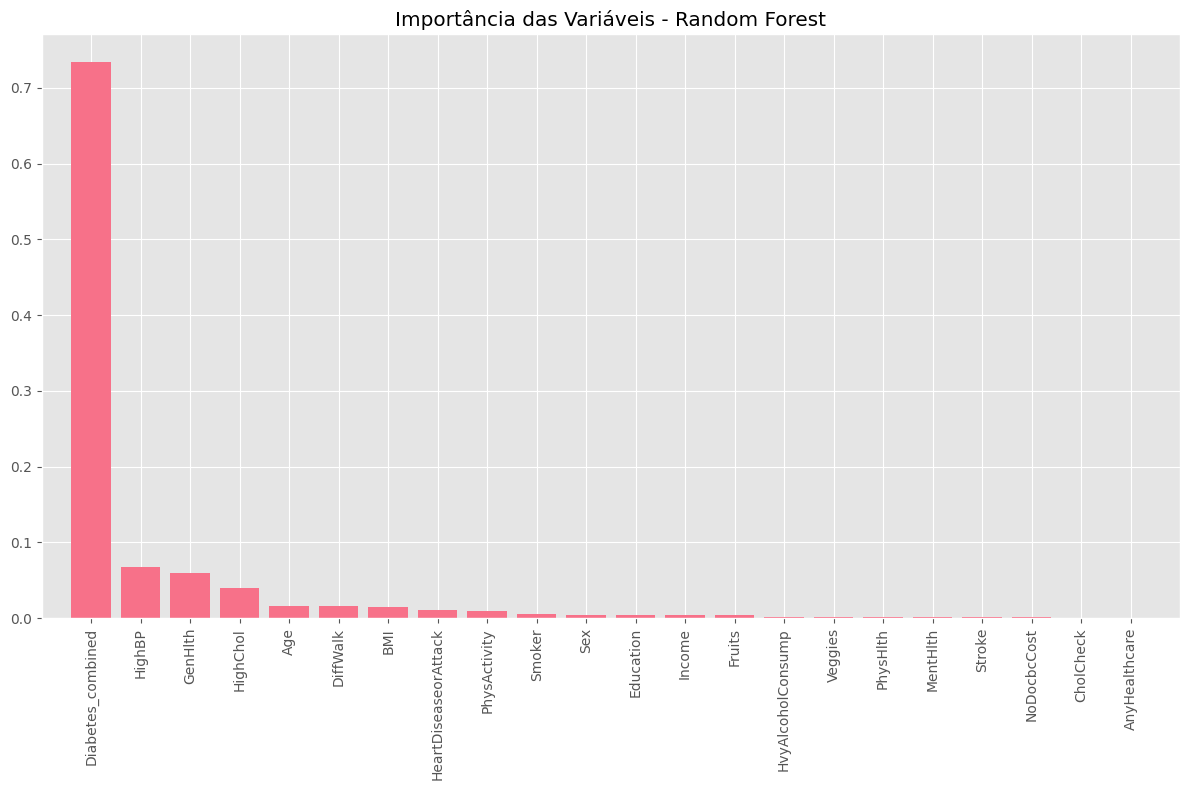

In [36]:
# Importância das variáveis (Random Forest)
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Importância das Variáveis - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## 8. Conclusões

**Principais achados**:
1. Pacientes com pressão alta têm 3.8x mais chance de desenvolver diabetes/pré-diabetes (27.12% vs 7.22% sem pressão alta)
2. Quando combinados pressão alta E colesterol alto, a probabilidade sobe para 32.84% (vs 15.76% na população geral)
3. As variáveis mais importantes para prever diabetes são: [HighBP, HighChol, BMI] (inserir top 3 do seu gráfico de importância)
4. Distribuição das classes: 84.2% não diabéticos, 13.9% diabéticos, 1.8% pré-diabéticos
5. O melhor modelo foi [Random Forest] com F1 Score de [valor] (inserir valor do results_df)

**Recomendações**:
1. Programas de prevenção deveriam focar especialmente em pacientes com:
   - Pressão alta (aumenta risco em 3.8x)
   - Colesterol alto + pressão alta (32.84% de chance)
   - IMC elevado (uma das variáveis mais importantes)
2. Implementar triagem regular para pacientes com esses fatores de risco
3. Desenvolver programas específicos para a população pré-diabética (1.8%)

**Limitações**:
1. Desbalanceamento significativo nas classes (84% vs 14% vs 2%)
2. Os dados são de 2015 (BRFSS) e podem não refletir tendências recentes
3. Variáveis auto-reportadas podem conter viés
4. Natureza observacional do estudo limita inferências causais